## Punto 5

In [1]:
import psycopg2

connection = psycopg2.connect(database="julian_acevedo_db",  
                                    user="julian_acevedo_user", 
                                    password="password", 
                                    host="localhost", 
                                    port="5432"
                                )
cursor = connection.cursor()

cursor.execute('''DROP TABLE IF EXISTS cardano_prices''')
cursor.execute('''CREATE TABLE cardano_prices (
                date DATE,
                open NUMERIC,
                high NUMERIC,
                low NUMERIC,
                close NUMERIC,
                adj_close NUMERIC,
                volume BIGINT);
                ''')

print("Table created successfully")

connection.commit()
connection.close()

Table created successfully


In [2]:
import psycopg2
import csv

# Establecer conexión
conn = psycopg2.connect(database="julian_acevedo_db",  
                                    user="julian_acevedo_user", 
                                    password="password", 
                                    host="localhost", 
                                    port="5432"
                                )

# Crear un cursor
cur = conn.cursor()

# Abrir el archivo CSV
file=r'C:\BK\Julian Acevedo\WFM_2021-11-08\WFM nov.2021\Analitica\U.NORTE\Vizualizacion datos R y Python\Tarea_1\Cardano_USD.csv'
with open(file, mode='r', newline='', encoding='utf-8') as f: #Aqui tienes que poner el link de tu archivo
    reader = csv.reader(f)
    next(reader)  # Saltar la cabecera
    for row in reader:
        # Convertir 'null' a None
        row = [None if x == 'null' else x for x in row]
        cur.execute(
            "INSERT INTO cardano_prices (date, open, high, low, close, adj_close, volume) VALUES (%s, %s, %s, %s, %s, %s, %s)",
            row
        )

# Confirmar los cambios
conn.commit()

# Cerrar el cursor y la conexión
cur.close()
conn.close()


In [3]:
import pandas as pd

# Define la ruta del archivo
file_path = r'C:\BK\Julian Acevedo\WFM_2021-11-08\WFM nov.2021\Analitica\U.NORTE\Vizualizacion datos R y Python\Tarea_1\Cardano_USD.csv'

# Intenta leer el archivo CSV
try:
    data_frame = pd.read_csv(file_path)
    print(data_frame.head())  # Imprime las primeras 5 filas del DataFrame

except FileNotFoundError:
    print(f'El archivo no se encuentra: {file_path}')
except Exception as e:
    print(f'Ocurrió un error: {e}')


         Date      Open      High       Low     Close  Adj Close      Volume
0  2017-10-01  0.021678  0.032226  0.017354  0.024969   0.024969  50068700.0
1  2017-10-02  0.024607  0.030088  0.019969  0.025932   0.025932  57641300.0
2  2017-10-03  0.025757  0.027425  0.020690  0.020816   0.020816  16997800.0
3  2017-10-04  0.020864  0.022806  0.020864  0.021931   0.021931   9000050.0
4  2017-10-05  0.021951  0.022154  0.020859  0.021489   0.021489   5562510.0


In [4]:
import pandas as pd
import plotly.graph_objects as go

# Conectar a la base de datos y obtener los datos
# Reemplaza con tu conexión a la base de datos
conn = psycopg2.connect(database="julian_acevedo_db",  
                                    user="julian_acevedo_user", 
                                    password="password", 
                                    host="localhost", 
                                    port="5432"
                                )
df = pd.read_sql("SELECT * FROM cardano_prices", conn)

# Crear el gráfico de candlestick
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'])])

fig.update_layout(title='Gráfico de Candlestick de Cardano USD (ADA-USD)',
                  xaxis_title='Fecha',
                  yaxis_title='Precio')

fig.show()


C:\Users\juacevedo.ATLANTICQI\AppData\Local\Temp\ipykernel_43324\2396682425.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM cardano_prices", conn)


EDA

              open         high          low        close    adj_close  \
count  1471.000000  1471.000000  1471.000000  1471.000000  1471.000000   
mean      0.374234     0.393359     0.354385     0.375726     0.375726   
std       0.609602     0.639195     0.578952     0.611501     0.611501   
min       0.018414     0.021050     0.017354     0.018539     0.018539   
25%       0.047560     0.049503     0.046073     0.047592     0.047592   
50%       0.093398     0.096776     0.090105     0.093434     0.093434   
75%       0.301339     0.318211     0.283567     0.301889     0.301889   
max       2.966390     3.099186     2.907606     2.968239     2.968239   

             volume  
count  1.471000e+03  
mean   1.090947e+09  
std    2.258370e+09  
min    1.739460e+06  
25%    5.366896e+07  
50%    1.359691e+08  
75%    6.999972e+08  
max    1.914198e+10  


C:\Users\juacevedo.ATLANTICQI\AppData\Local\Temp\ipykernel_43324\1596178925.py:17: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



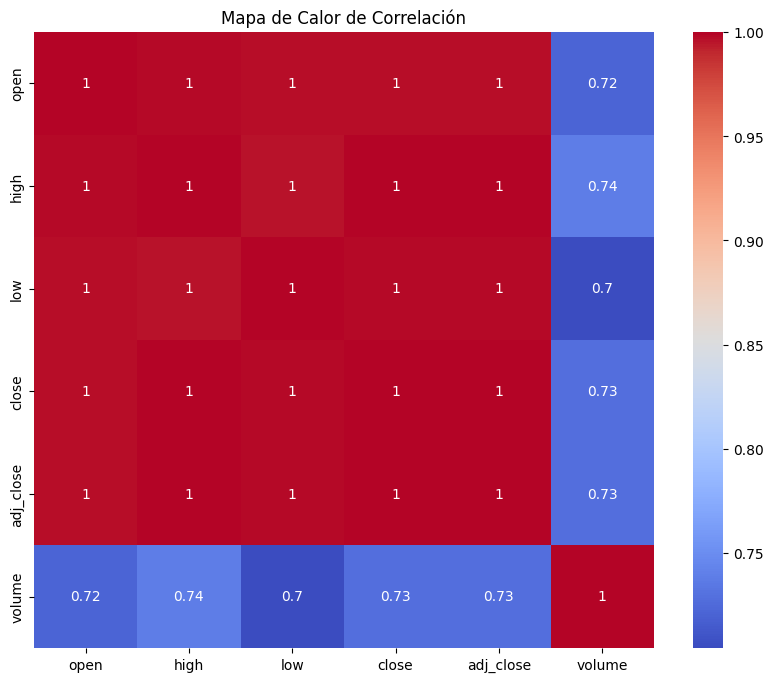

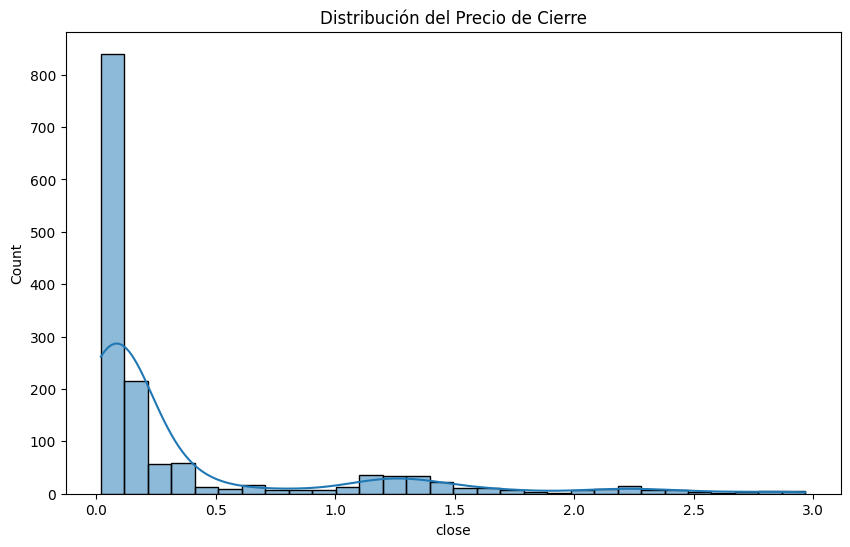

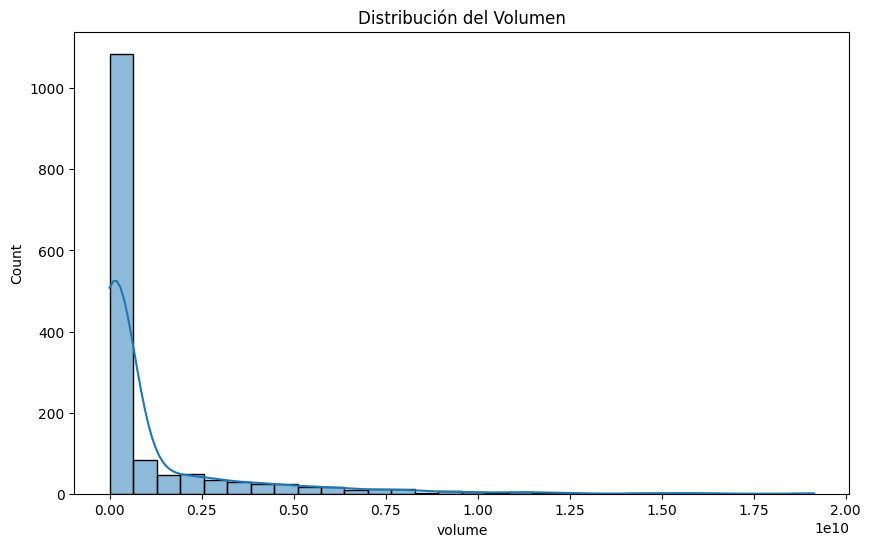

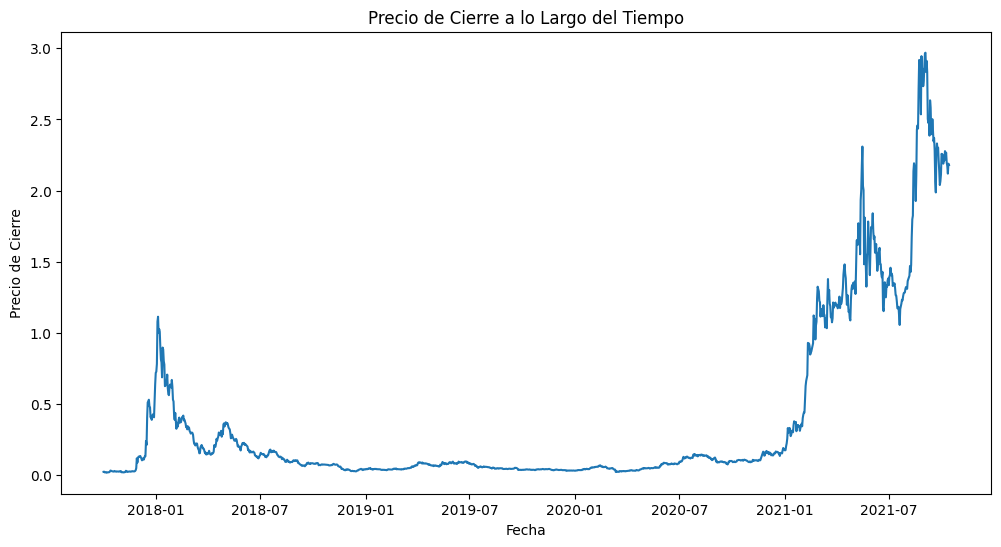

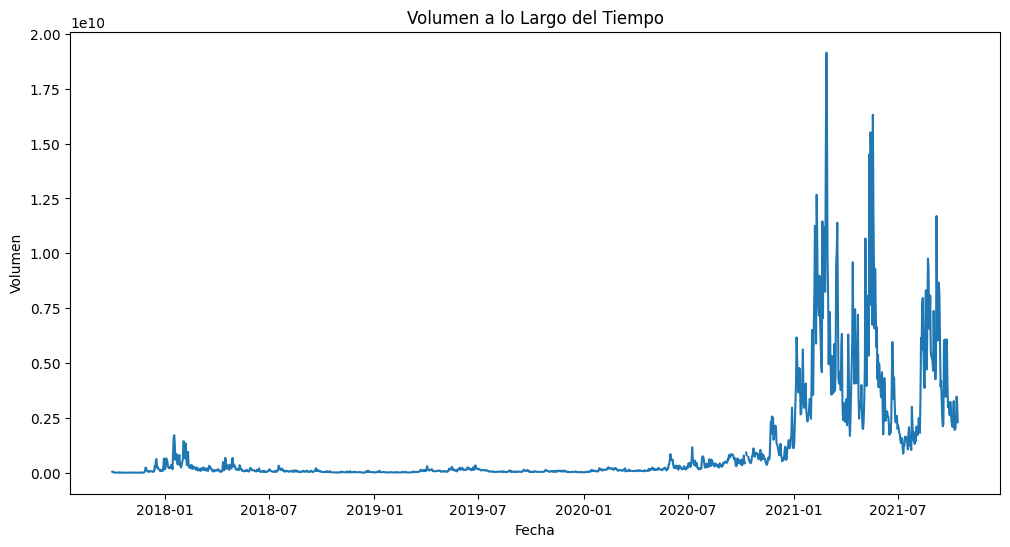

In [5]:
import pandas as pd
import psycopg2
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

def realizar_eda():
    conn = psycopg2.connect(database="julian_acevedo_db",  
                                    user="julian_acevedo_user", 
                                    password="password", 
                                    host="localhost", 
                                    port="5432"
                                )

    # Consultar los datos
    query = "SELECT * FROM cardano_prices"
    df = pd.read_sql(query, conn)

    # Cerrar la conexión
    conn.close()

    # Estadísticas Descriptivas
    print(df.describe())

    # Tendencias y Patrones (Gráfico de Candlestick)
    fig = go.Figure(data=[go.Candlestick(x=df['date'],
                    open=df['open'],
                    high=df['high'],
                    low=df['low'],
                    close=df['close'])])

    fig.update_layout(title='Gráfico de Candlestick de Cardano',
                      xaxis_title='Fecha',
                      yaxis_title='Precio')

    fig.show()

    # Correlaciones (excluyendo la columna 'date')
    corr = df.drop(columns=['date']).corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Mapa de Calor de Correlación')
    plt.show()

    # Distribución de los Datos
    plt.figure(figsize=(10, 6))
    sns.histplot(df['close'], kde=True, bins=30)
    plt.title('Distribución del Precio de Cierre')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.histplot(df['volume'], kde=True, bins=30)
    plt.title('Distribución del Volumen')
    plt.show()

    # Análisis Temporal
    plt.figure(figsize=(12, 6))
    plt.plot(df['date'], df['close'])
    plt.title('Precio de Cierre a lo Largo del Tiempo')
    plt.xlabel('Fecha')
    plt.ylabel('Precio de Cierre')
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(df['date'], df['volume'])
    plt.title('Volumen a lo Largo del Tiempo')
    plt.xlabel('Fecha')
    plt.ylabel('Volumen')
    plt.show()

# Llamar a la función para realizar el EDA
realizar_eda()
